# **Import Libraries and Data**

In [6]:
!pip install kaggle # Install the Kaggle API library, which allows interaction with datasets on Kaggle
!mkdir ~/.kaggle # Create a hidden directory named `.kaggle` in the home directory to store the Kaggle API key
!cp kaggle.json ~/.kaggle/ # Copy the `kaggle.json` file (which contains Kaggle API credentials) into the `.kaggle` directory
!chmod 600 ~/.kaggle/kaggle.json # Change the permission of the `kaggle.json` file to be readable and writable only by the owner
!kaggle datasets download mlg-ulb/creditcardfraud # Use the Kaggle API to download the credit card fraud detection dataset from the specified Kaggle dataset URL
!unzip /content/creditcardfraud.zip # Unzip the downloaded dataset file into the current working directory (usually `/content` in Google Colab)

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 97% 64.0M/66.0M [00:00<00:00, 632MB/s]
100% 66.0M/66.0M [00:00<00:00, 638MB/s]
Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
import sklearn
print(sklearn.__version__)

1.6.1


In [3]:
!pip install scikit-learn==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-

In [1]:
!pip install ydata-profiling  # Install the ydata-profiling library for automated EDA

from ydata_profiling import ProfileReport  # Import ProfileReport for automated EDA
import pandas as pd  # Data manipulation
import numpy as np  # Numerical computations
import tensorflow as tf  # Deep learning framework
from tensorflow import keras  # High-level API for building models
from tensorflow.keras import layers  # Neural network layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.metrics import AUC, Precision, Recall
from sklearn.model_selection import train_test_split  # Split data into train/test sets
from sklearn.preprocessing import StandardScaler  # Normalize features
from sklearn.feature_selection import SelectKBest, f_classif # Import feature selection tools
from sklearn.svm import LinearSVC # Using LinearSVC for efficiency on large datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, f1_score  # Evaluation metrics
from imblearn.over_sampling import SMOTE  # Handle class imbalance with synthetic samples
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
import missingno as msno
import warnings
warnings.filterwarnings('ignore') # ignore warnings
pd.set_option('display.max_columns', None) # to display the total number columns present in the dataset

  Using cached ydata_profiling-4.16.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached phik-0.12.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached multimethod-1.12-py3-none-any.whl.metadata (9.6 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached dacite-1.9.2-py3-none-any.whl.metadata (17 kB)
  Using cached puremagic-1.30-py3-none-any.whl.metadata (5.8 kB)
Using cached ydata_profiling-4.16.1-py2.py3-none-any.whl (400 kB)
Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
Using cached dacite-1.9.2-py3-none-any.whl (16 kB)
Using cached multimethod-1.12-py3-none-any.whl (10 kB)
Using cached phik-0.12.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (687 kB)
Using cached visions-0.8.1-py3-none-any.whl (105 kB)
Using cached puremagic-1.30-py3-none-any.whl (43 kB)


In [7]:
df = pd.read_csv('/content/creditcard.csv')  # Load the credit card fraud dataset into a DataFrame

Credit card fraud poses a significant threat to financial institutions and consumers worldwide, leading to substantial financial losses and erosion of trust. The goal of this project is to develop robust machine learning models capable of accurately identifying fraudulent transactions within a highly imbalanced dataset. This Kaggle challenge dataset, characterized by anonymized principal components ('V' features) along with 'Time' and 'Amount' transaction details, presents a realistic scenario for building effective fraud detection systems.

Our Objectives:
Our primary objectives in this analysis are multifaceted, aiming to build a comprehensive understanding of the dataset and develop high-performing predictive models:

Feature Selection and Importance Analysis: We aim to identify the most influential features that contribute significantly to distinguishing between legitimate and fraudulent transactions. We will leverage statistical methods like ANOVA and model-based techniques such as Random Forest Feature Importance to rank features based on their predictive power. This step is crucial for understanding the underlying patterns of fraud and potentially reducing model complexity.

Model Performance Evaluation and Comparison: We will train and evaluate various classification models, including Random Forest, Decision Tree, Support Vector Machine (SVM), Artificial Neural Network (ANN), and Transformer models. Our evaluation will primarily rely on Receiver Operating Characteristic (ROC) curves and their corresponding Area Under the Curve (AUC) scores, which are particularly suitable for assessing performance on imbalanced datasets. This will allow us to compare the strengths and weaknesses of different algorithms in this context.

Building a Robust Fraud Detection System: Ultimately, our goal is to identify the most effective model and a subset of highly relevant features to construct a reliable and accurate credit card fraud detection system. This system should minimize false positives (legitimate transactions flagged as fraud) while maximizing true positives (actual fraudulent transactions correctly identified), thereby providing a valuable tool for preventing financial losses.

By systematically analyzing feature importance and rigorously comparing model performances, we aim to deliver a solution that not only achieves high accuracy but also provides actionable insights into the nature of credit card fraud.

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Create a profile report for the dataset with a custom title and full-width styling
profile = ProfileReport(
    df,
    title="Credit Card Fraud Detection Dataset Profile",
    html={"style": {"full_width": True}},
    sort=None,  # Keep original column order
    progress_bar=True  # Display progress bar during report generation
)

# Save the generated profile report as an HTML file
output_file = "credit_card_fraud_profile_report.html"
profile.to_file(output_file)

In [8]:
df.head(5) # Display the first 10 rows of the dataset to preview the data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.columns.to_list() # Display columns names

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [10]:
df.describe().transpose()  # Get summary statistics for each column and transpose for better readability

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [11]:
df.shape # Get the dimensions of the dataset (rows, columns)

(284807, 31)

In [12]:
num_cols = df.select_dtypes(include=['number']).shape[1] # Count numerical columns (int, float types)
cat_cols = df.select_dtypes(include=['object', 'category']).shape[1] # Count categorical columns (object, category types)

print(f"Numerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

Numerical columns: 31
Categorical columns: 0


**Numerical Features Only:**

- All features are numerical, making scaling straightforward (e.g., StandardScaler).

- No categorical variables to encode.

In [13]:
df.duplicated().sum()

1081

In [14]:
df.isna().sum()  # Count the number of missing (NaN) values in each column

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


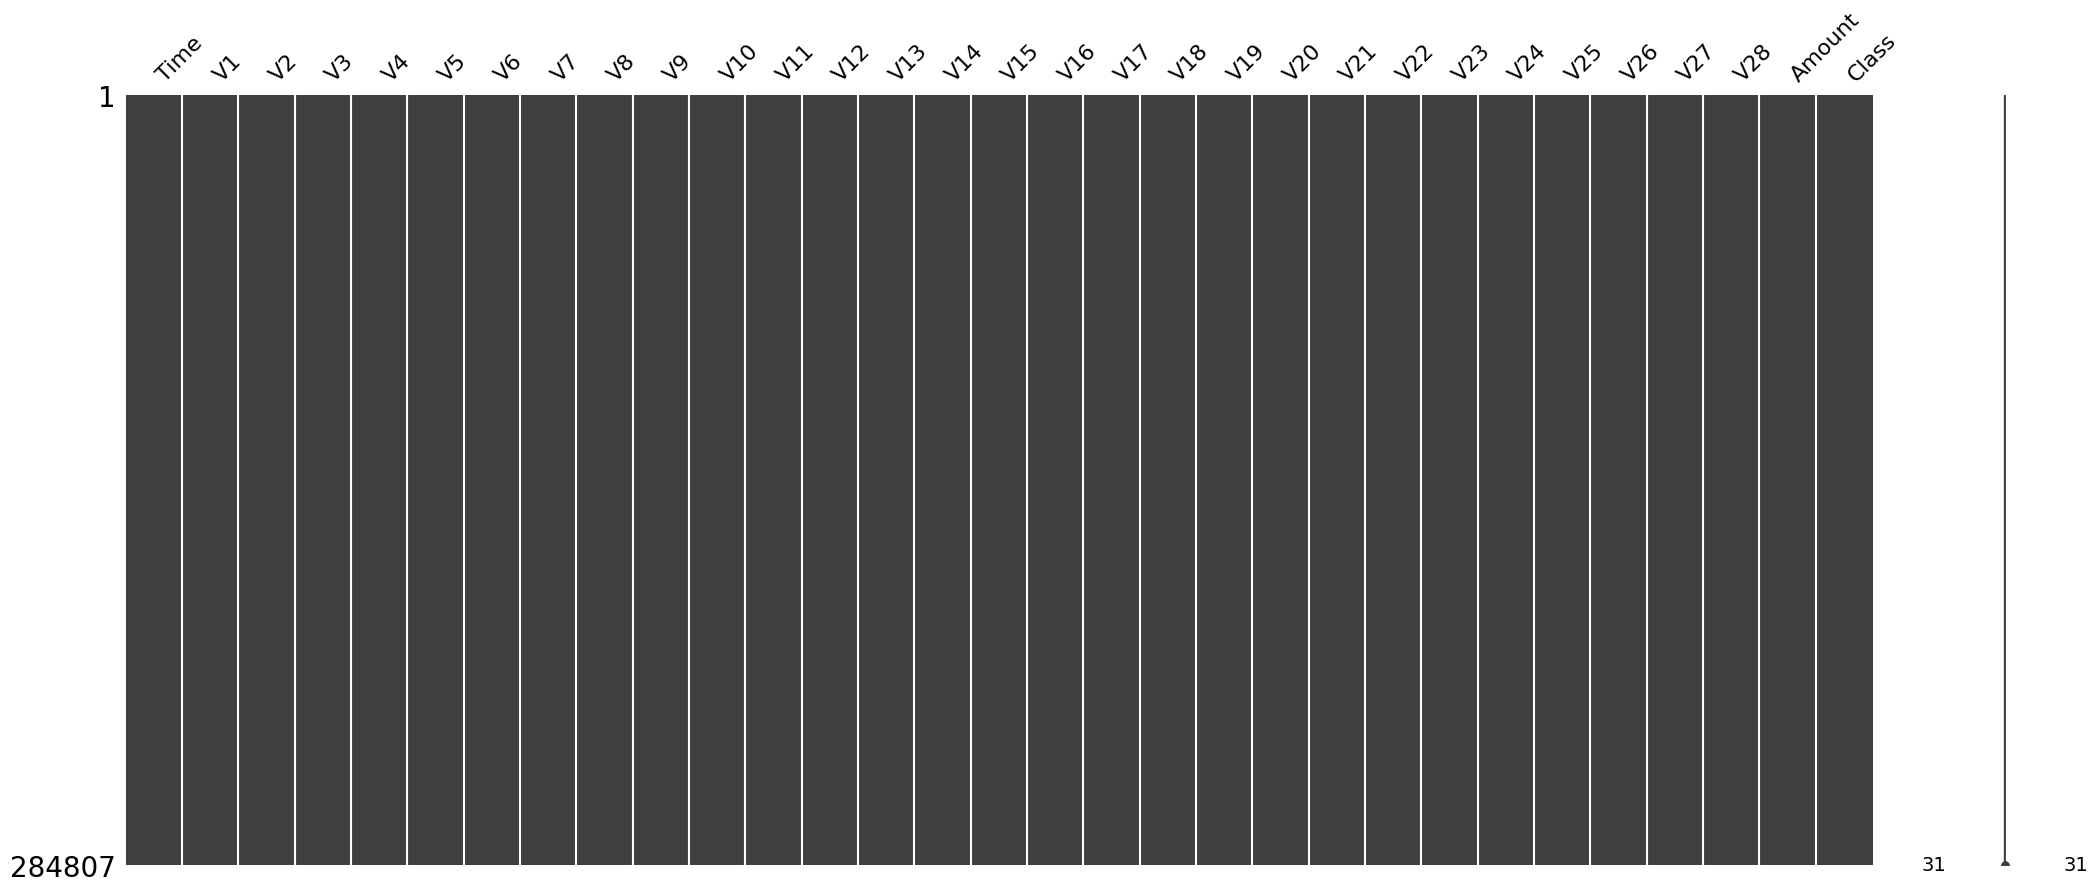

In [15]:
msno.matrix(df);

**No Missing Data:**

The dataset contains no missing values, simplifying preprocessing.

In [16]:
df['Class'].value_counts()  # Count the number of samples in each class (fraud vs. non-fraud)

,count
Class,
0,284315
1,492


In [17]:
# Calculate and print the percentage of non-fraudulent transactions
print('No Frauds', round(df['Class'].value_counts()[0] / len(df) * 100, 2), '% of the dataset')

# Calculate and print the percentage of fraudulent transactions
print('Frauds', round(df['Class'].value_counts()[1] / len(df) * 100, 2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


**Highly Imbalanced Dataset:**

The target variable Class is heavily skewed:

Non-fraudulent transactions (Class = 0) make up ~99.83%

Fraudulent transactions (Class = 1) make up only ~0.17%

This imbalance means models must be carefully trained to avoid bias towards the majority class.

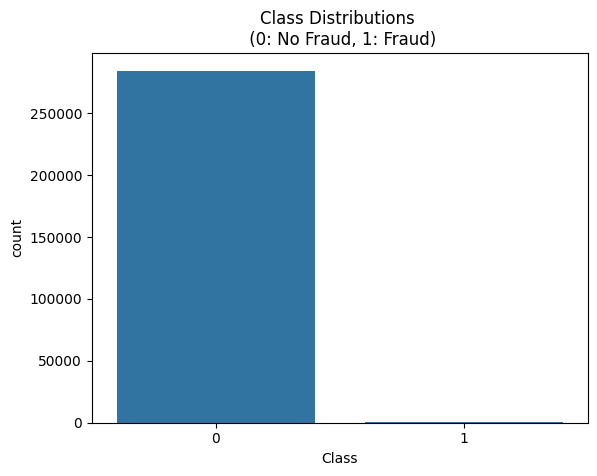

In [18]:
sns.countplot(x=df['Class'])  # Plot count of each class (fraud vs no fraud)
plt.title('Class Distributions \n (0: No Fraud, 1: Fraud)')  # Add title to the plot
plt.show();  # Display the plot

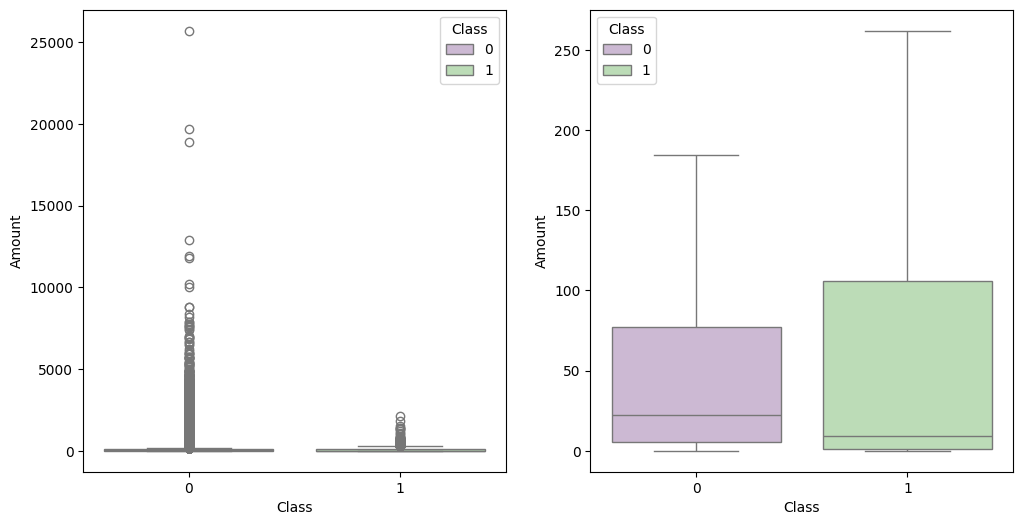

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

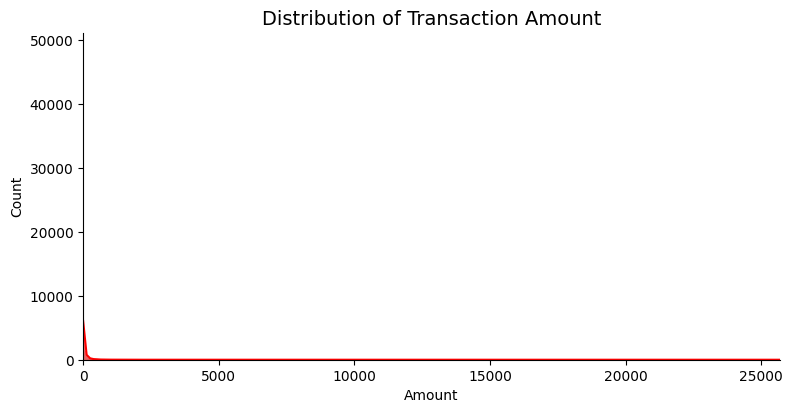

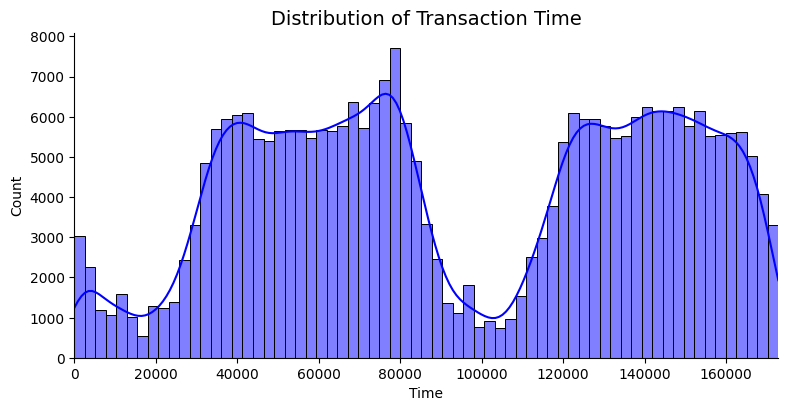

In [21]:
# Plot distribution of the 'Amount' feature with KDE and red color
sns.displot(df['Amount'], color='r', kde=True, height=4, aspect=2)
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.xlim([df['Amount'].min(), df['Amount'].max()])
plt.show()

# Plot distribution of the 'Time' feature with KDE and blue color
sns.displot(df['Time'], color='b', kde=True, height=4, aspect=2)
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlim([df['Time'].min(), df['Time'].max()])
plt.show()

**Feature Distributions:**

- Transaction Amount: Distribution is right-skewed — most transactions have low amounts, but a few are very large. This might help distinguish frauds, as frauds may cluster at different amount ranges.

- Transaction Time: Spans a wide range; analyzing frauds by time (e.g., odd hours) could provide useful signals.

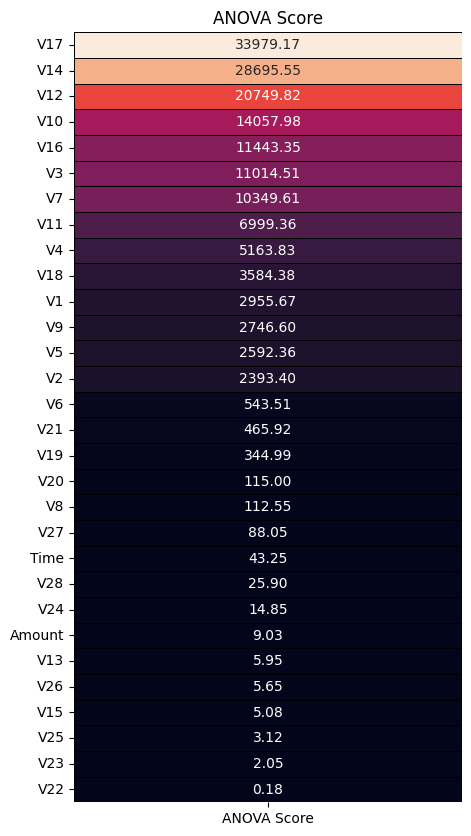

In [22]:
# Using the ANOVA statistical method as a feature selection technique

features = df.loc[:, :'Amount']  # Select all columns from start to 'Amount' as features
target = df.loc[:, 'Class']  # Select the target column

best_features = SelectKBest(score_func=f_classif, k='all')  # Initialize ANOVA F-test with all features
fit = best_features.fit(features, target)  # Fit the model

# Create a DataFrame of feature scores
featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])
featureScores = featureScores.sort_values(ascending=False, by='ANOVA Score')  # Sort by score descending

# Plot heatmap of ANOVA scores
plt.figure(figsize=(5, 10))
sns.heatmap(featureScores, annot=True, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('ANOVA Score');  # Set title

This plot displays a heatmap titled "ANOVA Score," which represents the results of an ANOVA (Analysis of Variance) statistical test applied as a feature selection technique. The table-like structure shows various features and their corresponding ANOVA scores, sorted in descending order of importance.

ANOVA as a Feature Selection Method: The code explicitly states that ANOVA (specifically, f_classif for classification tasks) is used to calculate the variance between groups (e.g., fraudulent vs. non-fraudulent transactions) for each feature. A higher ANOVA score indicates that the feature is more effective at discriminating between the classes.

Feature Ranking:

Top Features: 'V17' has the highest ANOVA score of 33979.17, followed by 'V14' (28695.55), 'V12' (20749.82), 'V10' (14057.98), and 'V16' (11443.35). These features exhibit the largest differences in means across the target classes, suggesting they are highly relevant for predicting credit card fraud. The warmer colors (light orange to deep red) visually emphasize their high scores.

Mid-Range Features: Features like 'V3', 'V7', 'V11', 'V4', and 'V18' also show substantial ANOVA scores, indicating their importance.

Least Important Features: Towards the bottom, features such as 'V22' (0.18), 'V23' (2.05), 'V25' (3.12), 'V26' (5.08), 'V13' (5.95), and 'Amount' (9.03) have very low ANOVA scores. This implies that their means are not significantly different across the fraud and non-fraud classes, making them less impactful for distinguishing between them.

Comparison with Random Forest Importance (if available): It's interesting to note the different rankings compared to a Random Forest feature importance chart (if you have one). While some top features might overlap (e.g., V14, V17), the relative importance can differ as ANOVA is a univariate statistical test, while Random Forest considers interactions between features.

Insights from 'Time' and 'Amount': Similar to the Random Forest feature importance, the 'Time' and 'Amount' features have relatively low ANOVA scores (43.25 and 9.03, respectively). This reinforces the idea that, in this dataset, the anonymized 'V' features are far more discriminative for fraud detection.

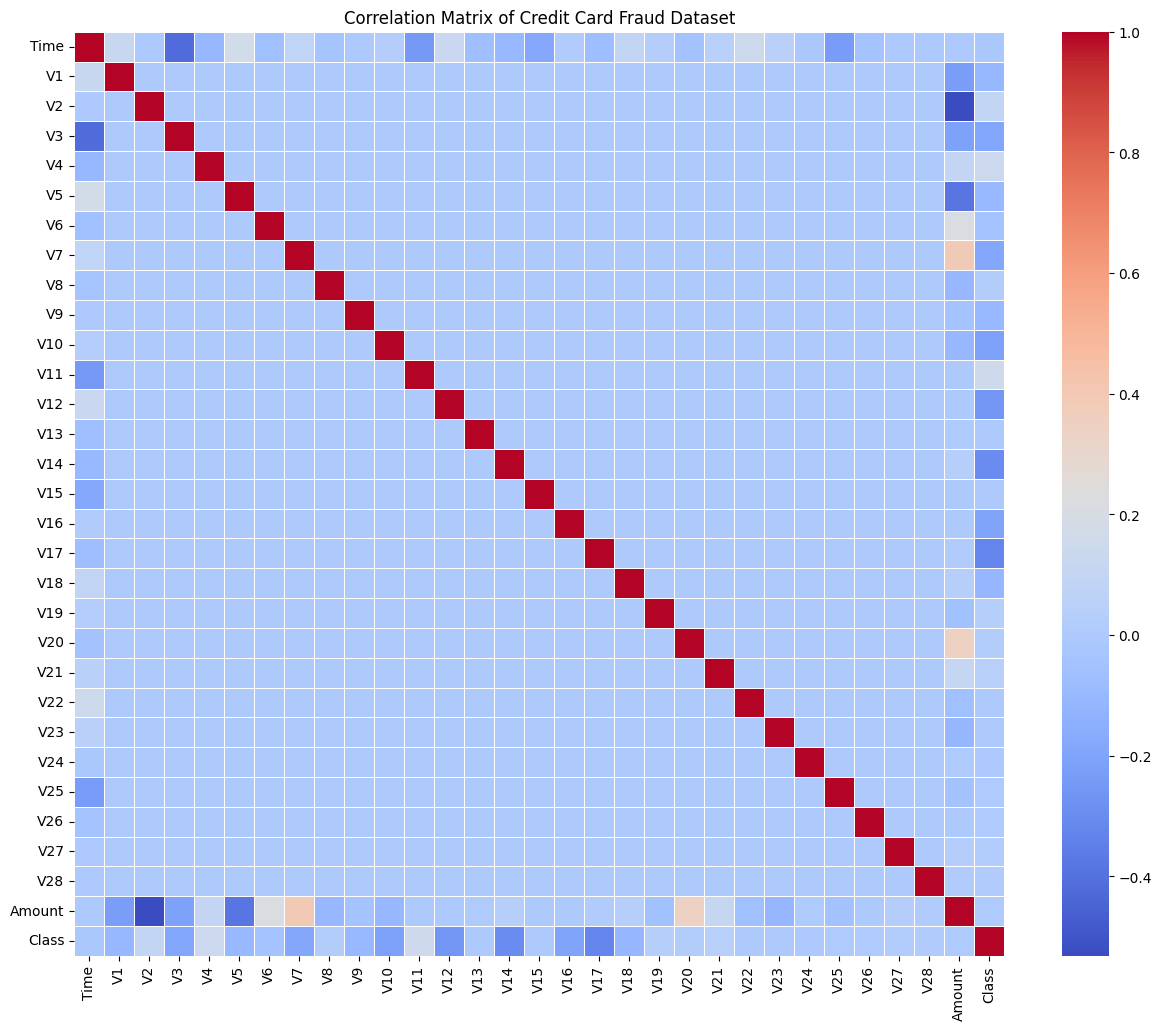

In [23]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(15, 12))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix,
            annot=False,        # Set to True if you want correlation values shown
            cmap='coolwarm',    # Colormap for better visualization
            linewidths=0.5,
            linecolor='white')

# Set plot title
plt.title('Correlation Matrix of Credit Card Fraud Dataset')

# Show the plot
plt.show()

# **Preprocessing**

### **Dataset Splitting:**

In [24]:
X = df.drop('Class', axis=1)  # Drop the target column 'Class' to create the feature matrix X
y = df['Class']  # Assign the target column 'Class' to the variable y (labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shape (rows, columns) of the training and test feature sets
print(f"\nTraining set shape: {X_train.shape}, Test set shape: {X_test.shape}")
# Print the normalized distribution (as percentages) of the target classes in the training set
print(f"Training target distribution:\n{y_train.value_counts(normalize=True)}")
# Print the normalized distribution (as percentages) of the target classes in the test set
print(f"Test target distribution:\n{y_test.value_counts(normalize=True)}")


Training set shape: (227845, 30), Test set shape: (56962, 30)
Training target distribution:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
Test target distribution:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


### **Feature Scaling:**

In [25]:
scaler = StandardScaler()  # Initialize StandardScaler to standardize features by removing the mean and scaling to unit variance

# Fit the scaler on 'Time' and 'Amount' columns of the training set and transform them
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])

# Use the same scaler parameters to transform 'Time' and 'Amount' columns in the test set
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

### **Handle Class Imbalance:**

In [26]:
smote = SMOTE(random_state=42)  # Initialize SMOTE to handle class imbalance by generating synthetic minority samples

# Apply SMOTE to the training data to resample and balance the classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the shape of the resampled training features
print(f"Resampled training set shape: {X_train_resampled.shape}")

# Print the class distribution after resampling (should be balanced)
print(f"Resampled training target distribution:\n{y_train_resampled.value_counts(normalize=True)}")

Resampled training set shape: (454902, 30)
Resampled training target distribution:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


### **Prepare Data for Transformer Input:**

In [27]:
num_features = X_train_resampled.shape[1]  # Get the number of features after resampling
embedding_dim = 32  # Set embedding dimension for each feature in the Transformer model

# Reshape training data to fit Transformer input format: (samples, features, 1)
X_train_transformer = X_train_resampled.values.reshape(-1, num_features, 1)

# Reshape test data the same way
X_test_transformer = X_test.values.reshape(-1, num_features, 1)

# Print the new shapes of the data prepared for Transformer input
print(f"\nTransformer input shape (training): {X_train_transformer.shape}")
print(f"Transformer input shape (testing): {X_test_transformer.shape}")


Transformer input shape (training): (454902, 30, 1)
Transformer input shape (testing): (56962, 30, 1)


# **Model**

### **1. Linear SVC:**

ROC AUC Score (SVM) (using decision_function): 0.9739
Accuracy (SVM): 0.9771

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



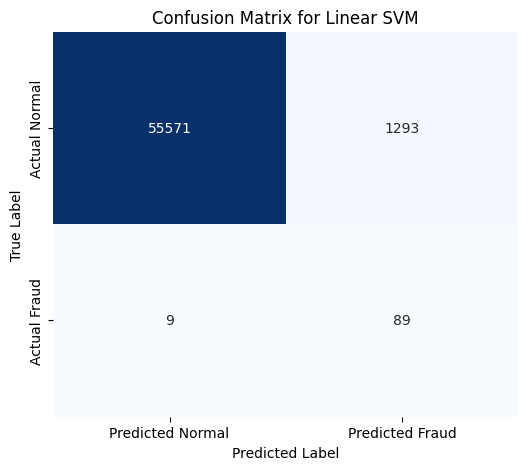

In [30]:
# LinearSVC is suitable for large datasets and uses a linear kernel.
# 'dual=False' is preferred when n_samples > n_features.
# 'max_iter' might need adjustment for convergence.
svm_model = LinearSVC(random_state=42, dual=False, max_iter=10000) # Increased max_iter for convergence
svm_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the Model
y_pred = svm_model.predict(X_test)

# For ROC AUC, LinearSVC doesn't directly provide predict_proba.
# We can use decision_function and then scale it or simply use predict for classification metrics.
# If probability estimates are crucial, you might need to use CalibratedClassifierCV with LinearSVC
# or switch to SVC(probability=True) which is slower.
# For simplicity, we'll use decision_function for AUC if available, otherwise just classification report.
y_pred_proba = svm_model.decision_function(X_test)
# For binary classification, decision_function output can be directly used for AUC
# as it represents distance to hyperplane.
roc_auc_SVM = roc_auc_score(y_test, y_pred_proba)
accuracy_SVM = accuracy_score(y_test, y_pred)
print(f"ROC AUC Score (SVM) (using decision_function): {roc_auc_SVM:.4f}")
print(f"Accuracy (SVM): {accuracy_SVM:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Confusion Matrix for Linear SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **2. Decision Tree:**

ROC AUC Score (DT): 0.8865
Accuracy (DT): 0.9771

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.34      0.78      0.47        98

    accuracy                           1.00     56962
   macro avg       0.67      0.89      0.74     56962
weighted avg       1.00      1.00      1.00     56962



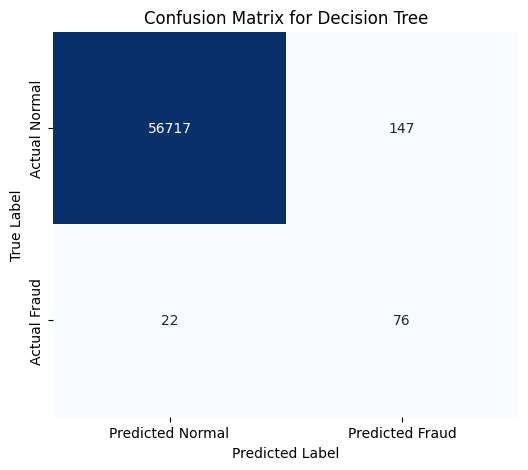

In [31]:
# Decision Tree with default settings (you can tune max_depth, min_samples_split, etc.)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Predict labels and probabilities
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# ROC AUC Score using probabilities
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"ROC AUC Score (DT): {roc_auc_dt:.4f}")
print(f"Accuracy (DT): {accuracy_dt:.4f}")

# Classification report
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **3. Random Forest:**

ROC AUC Score (RF): 0.9614
Accuracy (RF): 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



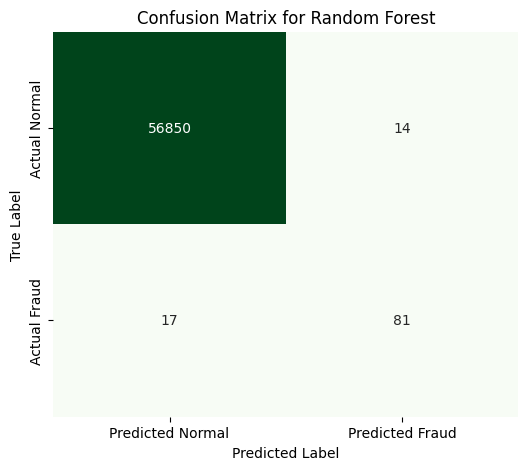

In [32]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=30,        # Number of trees
    random_state=42
    )
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability of the positive class (fraud)

roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"ROC AUC Score (RF): {roc_auc_rf:.4f}")
print(f"Accuracy (RF): {accuracy_rf:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **3. ANN:**

Epoch 1/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.9679 - auc: 0.9939 - loss: 0.0816 - precision: 0.9710 - recall: 0.9648 - val_accuracy: 0.9965 - val_auc: 0.9477 - val_loss: 0.0153 - val_precision: 0.3173 - val_recall: 0.8776
Epoch 2/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9969 - auc: 0.9996 - loss: 0.0123 - precision: 0.9948 - recall: 0.9989 - val_accuracy: 0.9980 - val_auc: 0.9432 - val_loss: 0.0150 - val_precision: 0.4595 - val_recall: 0.8673
Epoch 3/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9980 - auc: 0.9997 - loss: 0.0078 - precision: 0.9968 - recall: 0.9993 - val_accuracy: 0.9978 - val_auc: 0.9381 - val_loss: 0.0168 - val_precision: 0.4352 - val_recall: 0.8571
Epoch 4/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9984 - auc: 0.9997 - loss: 0.0064 - precision: 0.9975 - recall: 0.9994 - val_accuracy: 0.9984 - val_auc: 0.9332 - val_loss: 0.0191 - val_precision: 0.5188 - val_recall: 0.8469
Epoch 5/20
7108/7108

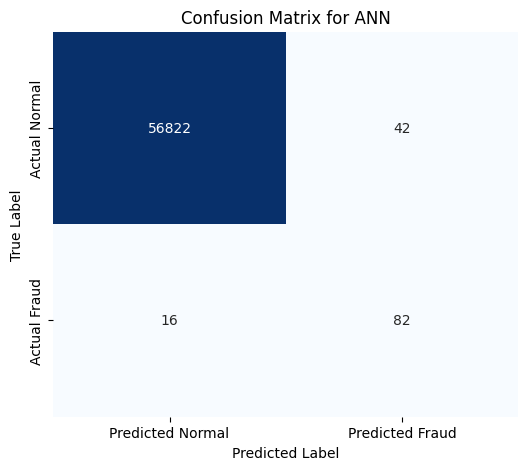

In [33]:
# Define the ANN architecture
ann_model = Sequential([
    Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
ann_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        AUC(name='auc'),
        Precision(name='precision'),
        Recall(name='recall')
    ]
)

# Train the model
history = ann_model.fit(X_train_resampled, y_train_resampled,
                        epochs=20,
                        batch_size=64,
                        validation_data=(X_test, y_test),
                        verbose=1)

# Predict probabilities and class labels
y_pred_proba_ann = ann_model.predict(X_test).ravel()
y_pred_ann = (y_pred_proba_ann > 0.5).astype(int)

# ROC AUC Score
print(f"Accuracy (ANN): {ann_model.evaluate(X_test, y_test, verbose=0)[1]:.4f}")
roc_auc_ann = roc_auc_score(y_test, y_pred_proba_ann)
print(f"ROC AUC Score (ANN): {roc_auc_ann:.4f}")

# Classification report
print("\nClassification Report (ANN):")
print(classification_report(y_test, y_pred_ann))

# Confusion matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Confusion Matrix for ANN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **4. Transformer:**

In [34]:
y_train_resampled.astype("float32")
y_test = y_test.astype("float32")

# Build the Transformer Model

def transformer_block(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Multi-Head Self-Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x) # Self-attention
    x = layers.Dropout(dropout)(x)
    res = x + inputs # Residual connection

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x) # Project back to original dim
    return x + res # Another residual connection

def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = keras.Input(shape=input_shape)

    # Initial projection for each feature to embedding_dim
    x = layers.Dense(embedding_dim, activation='relu')(inputs) # Shape (batch, num_features, embedding_dim)

    for _ in range(num_transformer_blocks):
        x = transformer_block(x, head_size, num_heads, ff_dim, dropout)

    # Global average pooling to flatten the sequence of feature embeddings
    x = layers.GlobalAveragePooling1D()(x)

    # MLP head for classification
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)

    outputs = layers.Dense(1, activation="sigmoid")(x) # Binary classification

    return keras.Model(inputs, outputs)

# Model parameters
input_shape = (num_features, 1) # Each feature is a 'token'
head_size = 256
num_heads = 4
ff_dim = 4
num_transformer_blocks = 2
mlp_units = [128]
dropout = 0.1
mlp_dropout = 0.1

model = build_transformer_model(
    input_shape,
    head_size=head_size,
    num_heads=num_heads,
    ff_dim=ff_dim,
    num_transformer_blocks=num_transformer_blocks,
    mlp_units=mlp_units,
    dropout=dropout,
    mlp_dropout=mlp_dropout,
)

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()],
)

model.summary()

# Train the Model
print("\nTraining the Transformer model...")
history = model.fit(
    X_train_transformer,
    y_train_resampled.astype("float32"),
    validation_data=(X_test_transformer, y_test),
    epochs=20,
    batch_size=64,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    ],
    verbose=1
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 30, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 30, 32)    │         64 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 30, 32)    │         64 │ dense_3[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 30, 32)    │    134,176 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 30, 32)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 30, 32)    │          0 │ dropout_3[0][0],  │
│                     │                   │            │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 30, 32)    │         64 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 30, 4)     │        132 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 30, 4)     │          0 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 30, 32)    │        160 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 30, 32)    │          0 │ conv1d_1[0][0],   │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 30, 32)    │         64 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 30, 32)    │    134,176 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 30, 32)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 30, 32)    │          0 │ dropout_6[0][0],  │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 30, 32)    │         64 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 30, 4)     │        132 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 30, 4)     │          0 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 30, 32)    │        160 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 30, 32)    │          0 │ conv1d_3[0][0], 

 Total params: 273,609 (1.04 MB)

 Trainable params: 273,609 (1.04 MB)

 Non-trainable params: 0 (0.00 B)


Training the Transformer model...
Epoch 1/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 114s 12ms/step - accuracy: 0.8973 - auc: 0.9339 - loss: 0.2787 - precision: 0.9582 - recall: 0.8306 - val_accuracy: 0.9673 - val_auc: 0.9544 - val_loss: 0.1815 - val_precision: 0.0444 - val_recall: 0.8776
Epoch 2/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 113s 10ms/step - accuracy: 0.9119 - auc: 0.9485 - loss: 0.2378 - precision: 0.9663 - recall: 0.8534 - val_accuracy: 0.9458 - val_auc: 0.9521 - val_loss: 0.2283 - val_precision: 0.0278 - val_recall: 0.8980
Epoch 3/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 80s 10ms/step - accuracy: 0.9138 - auc: 0.9544 - loss: 0.2285 - precision: 0.9687 - recall: 0.8552 - val_accuracy: 0.9608 - val_auc: 0.9569 - val_loss: 0.1694 - val_precision: 0.0376 - val_recall: 0.8878
Epoch 4/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 67s 9ms/step - accuracy: 0.9164 - auc: 0.9599 - loss: 0.2184 - precision: 0.9661 - recall: 0.8627 - val_accuracy: 0.9432 - val_auc: 0.9516 - val_loss: 0.2241 - val_precision: 0.0265 -


Evaluating the model on the test set...
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     56864
         1.0       0.05      0.88      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962


Confusion Matrix:
[[55355  1509]
 [   12    86]]


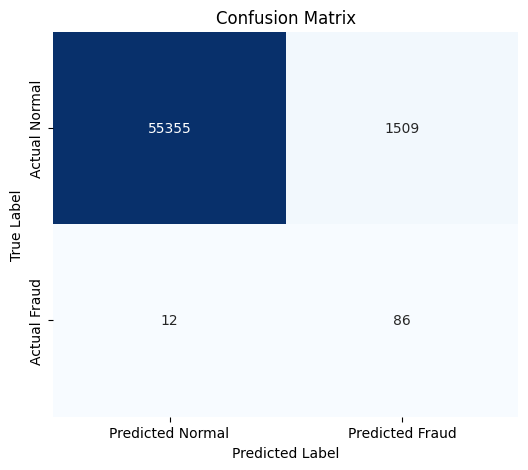


ROC AUC Score (Transformer): 0.9460
Accuracy (Transformer): 0.9733


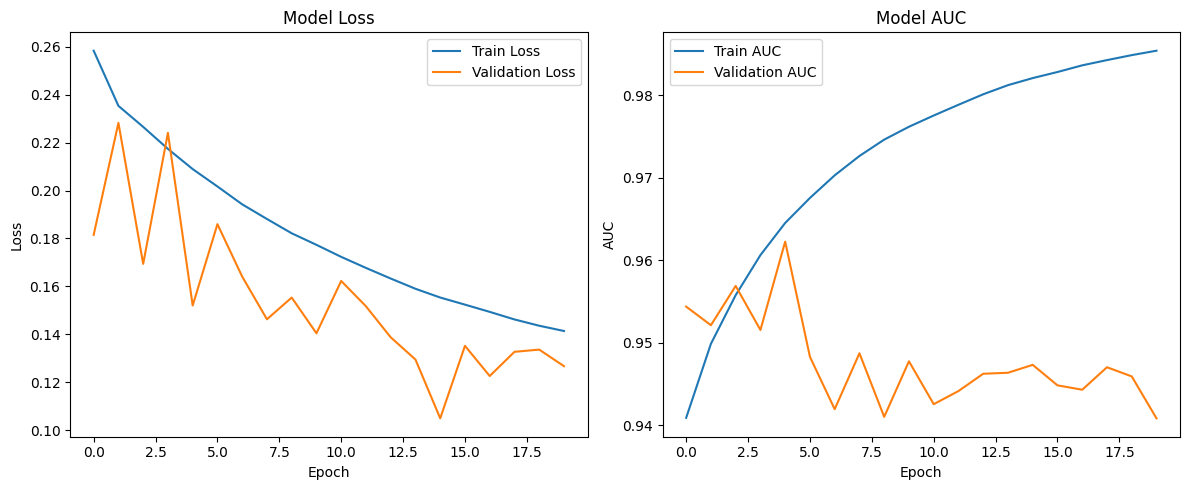

In [39]:
# Evaluate the Model
print("\nEvaluating the model on the test set...")
y_pred_proba_tf = model.predict(X_test_transformer).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

roc_auc_tf = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score (Transformer): {roc_auc_tf:.4f}")
# Compute Accuracy (optional, if not using model.evaluate)
accuracy_tf = accuracy_score(y_test, y_pred)
print(f"Accuracy (Transformer): {accuracy_tf:.4f}")

# Plotting training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

# **Compare Models**

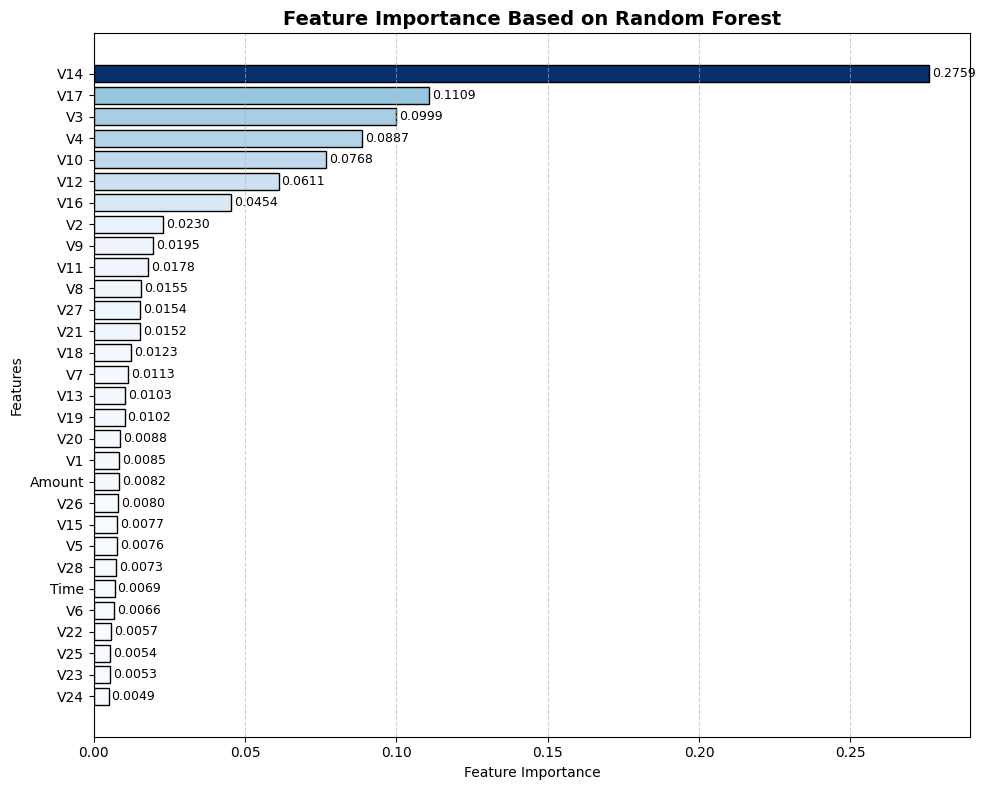

In [36]:
# Create the DataFrame for feature importances
RF_I = rf_model  # just matching your naming
d = {
    'Features': X_train.columns,
    'Feature Importance': RF_I.feature_importances_
}
df = pd.DataFrame(d)
df_sorted = df.sort_values(by='Feature Importance', ascending=True).reset_index(drop=True)

# Normalize feature importance for color mapping
norm = plt.Normalize(df_sorted['Feature Importance'].min(), df_sorted['Feature Importance'].max())
colors = plt.cm.Blues(norm(df_sorted['Feature Importance'].values))

# Plotting
plt.figure(figsize=(10, 8))
bars = plt.barh(df_sorted['Features'], df_sorted['Feature Importance'], color=colors, edgecolor='black')

# Add feature importance values to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', va='center', fontsize=9)

plt.title('Feature Importance Based on Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- Most Important Features: 'V14' stands out as the most important feature with an importance score of 0.2759, followed by 'V17' (0.1109), 'V3' (0.0999), and 'V4' (0.0887). These top features appear to be significantly more influential in the model's predictions compared to the others, as indicated by their longer bars and higher values. The use of darker shades of blue for these top features also highlights their prominence.

- Decreasing Importance: As we move down the list, the importance of the features gradually decreases. Features like 'V10', 'V12', and 'V16' still show notable importance.

- Least Important Features: Towards the bottom of the chart, features such as 'V24', 'V23', 'V25', and 'V22' have very low importance scores, suggesting they contribute minimally to the model's predictive power in this specific context.

- 'Amount' and 'Time' Features: Interestingly, the 'Amount' and 'Time' features, which are often fundamental in fraud detection datasets, are ranked quite low (0.0082 and 0.0069 respectively). This might imply that the 'V' features (which are typically PCA-transformed features in fraud datasets to protect user privacy) have captured most of the variance related to fraud, or that 'Amount' and 'Time' are less directly indicative of fraud after these transformations.

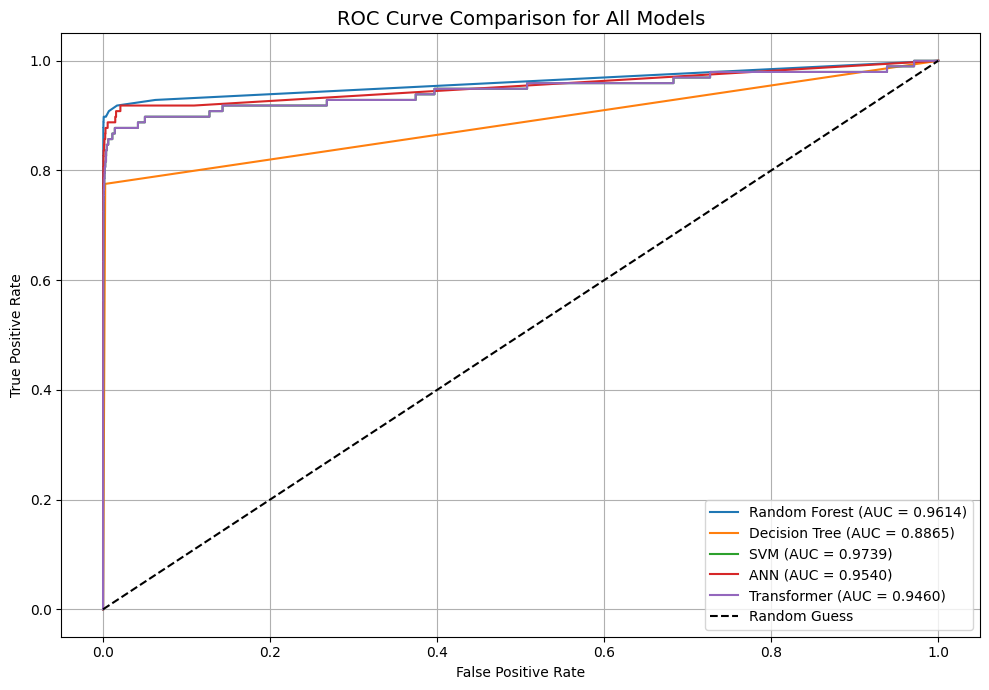

In [40]:
# Compute ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba)
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_proba_ann)
fpr_tf, tpr_tf, _ = roc_curve(y_test, y_pred_proba_tf)

# Plotting all ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_SVM:.4f})')
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC = {roc_auc_ann:.4f})')
plt.plot(fpr_tf, tpr_tf, label=f'Transformer (AUC = {roc_auc_tf:.4f})')

# Diagonal line for random chance
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Labels and formatting
plt.title('ROC Curve Comparison for All Models', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

This plot displays a "ROC Curve Comparison for All Models," which is a standard way to evaluate the performance of binary classification models, especially in imbalanced datasets like those found in credit card fraud detection.

ROC Curve (Receiver Operating Characteristic Curve): Each colored line represents the ROC curve for a different classification model. The curve plots the True Positive Rate (Sensitivity) on the y-axis against the False Positive Rate (1 - Specificity) on the x-axis at various threshold settings.

True Positive Rate (TPR): The proportion of actual positive cases (e.g., fraudulent transactions) that were correctly identified.

False Positive Rate (FPR): The proportion of actual negative cases (e.g., legitimate transactions) that were incorrectly identified as positive.

Area Under the Curve (AUC): The AUC value for each model is provided in the legend. The AUC quantifies the overall performance of the classifier.

An AUC of 1.0 indicates a perfect classifier.

An AUC of 0.5 (represented by the "Random Guess" dashed line) indicates a classifier that performs no better than random chance.

Higher AUC values generally indicate better model performance.

- Model Performance Comparison:

SVM (Support Vector Machine) (AUC = 0.9739): This model has the highest AUC among all models, suggesting it is the best performer in distinguishing between fraudulent and legitimate transactions. Its curve is closest to the top-left corner, indicating a high true positive rate with a low false positive rate.

Random Forest (AUC = 0.9614): This model also performs exceptionally well, very close to SVM. Its curve is nearly indistinguishable from SVM for much of the plot.

ANN (Artificial Neural Network) (AUC = 0.9540): ANN shows strong performance, slightly below Random Forest and SVM.

Transformer (AUC = 0.9460): The Transformer model, while still performing well above random guess, is slightly behind the top three.

Decision Tree (AUC = 0.8865): This model has the lowest AUC among the evaluated classification models, indicating it is the least effective in this comparison. Its curve is further away from the top-left corner compared to the other models.

"Random Guess" Line (Dashed Black Line): This diagonal line represents a classifier that performs no better than random chance. Any model performing above this line is better than random, and the further away from this line (towards the top-left corner), the better the model.

In [43]:
# Create your model metrics (replace with your actual metrics if you have cross-validation means)
accuracy_ann = ann_model.evaluate(X_test, y_test, verbose=0)[1]
model_names = ['Random Forest', 'Decision Tree', 'SVM', 'ANN', 'Transformer']
accuracy_means = [accuracy_rf, accuracy_dt, accuracy_SVM, accuracy_ann, accuracy_tf]
auc_means = [roc_auc_rf, roc_auc_dt, roc_auc_SVM, roc_auc_ann, roc_auc_tf]

# Build the DataFrame
compare = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_means,
    'AUC Score': auc_means,
})

# Style the table with background gradient
compare.style.background_gradient(cmap='YlGn')

,Model,Accuracy,AUC Score
0,Random Forest,0.999456,0.961418
1,Decision Tree,0.977143,0.886463
2,SVM,0.977143,0.973877
3,ANN,0.998982,0.954018
4,Transformer,0.973298,0.945961


This table presents a comparative evaluation of five machine learning models — Random Forest, Decision Tree, SVM, ANN, and a Transformer-based model — on a binary classification task (fraud detection). The models are assessed using two key metrics: Accuracy and AUC Score (Area Under the ROC Curve), which together provide insight into overall performance and class discrimination capability.

Random Forest achieved the highest accuracy (99.95%), indicating it correctly classified almost all samples. It also delivered a strong AUC of 0.96, showing high capability in distinguishing between classes.

SVM performed exceptionally well in terms of AUC (0.97) — the highest among all models — suggesting it is particularly good at ranking positive and negative samples, despite a slightly lower accuracy.

ANN (Artificial Neural Network) closely followed Random Forest, with accuracy near 99.9% and an AUC of 0.95, balancing both precision and generalization well.

Transformer, while slightly behind in accuracy (97.3%), still showed strong AUC performance (0.94), indicating good potential especially with further tuning or more data.

Decision Tree, as expected from a simpler model, had the lowest AUC (0.88) and accuracy (97.7%), suggesting it may overfit or underperform in complex feature interactions.

Random Forest and SVM emerge as the most robust models in this setup, with excellent accuracy and discriminative power. The ANN and Transformer models also perform competitively, and may benefit further from architectural tuning. Decision Tree, though interpretable, may not be optimal for this task without enhancements like pruning or ensembling.